<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
    <li><a href="https://#resample">Resample time-series data</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the norm to open the trade?</h3>


<h3>Import data</h3>
<p>
You can find the "Trading Dataset" from the following link: <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/BTCBUSD_trades_1m.csv">https://1824251045.rsc.cdn77.org/web/algohouse/data/BTCBUSD_trades_1m.csv</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [204]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['requests'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [205]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [206]:
import pandas as pd
import matplotlib.pylab as plt

#set precision 2
pd.options.display.float_format = '{:.2f}'.format

This function will download the dataset into your browser


In [207]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())



<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [208]:
filename = "https://1824251045.rsc.cdn77.org/web/algohouse/data/BTCBUSD_trades_1m.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [209]:
headers = ["time","open","high","low","close","volume","rec_count","avg_price"]

you will need to download the dataset; if you are running locally, please comment out the following


In [210]:
await download(filename, "BTCBUSD_trades_1m.csv")
filename="BTCBUSD_trades_1m.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [211]:
#our work dataframe
df = pd.read_csv(filename, index_col=0, low_memory=False)
#dataframe for calculating our accuracy
newdf = pd.read_csv(filename, index_col=0, low_memory=False)

df.columns = headers
newdf.columns = headers

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [212]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,time,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09


<h2>Making some values wrong</h2>


To have something to test functions, we need to replace some values:


In [213]:
import numpy as np

l1 = 0.07 # ?
l2 = 0.07 # Text
l3 = 0.07 # Negative

m = np.random.rand(len(df))
mask1 = m < l1 # ?
m = np.random.rand(len(df))
mask2 = m < l2 # Text
m = np.random.rand(len(df))
mask3 = m < l3 # Negative

#replace values in our dataframe
df.loc[mask1, 'rec_count'] = "?"
df.loc[mask2, 'volume'] = "Error"
df.loc[mask3, 'open'] = - df.loc[mask3, 'open']

#save dataframe 
df.to_csv("btc.csv", index=False)
print(df)

                      time     open     high      low    close volume  \
0      2022-11-11 14:38:00 16540.10 16540.10 16486.50 16486.50 304.95   
1      2022-11-11 14:39:00 16489.30 16493.30 16456.20 16462.10 319.26   
2      2022-11-11 14:40:00 16465.50 16496.00 16447.40 16492.90 290.90   
3      2022-11-11 14:41:00 16492.90 16547.10 16472.50 16543.00 314.05   
4      2022-11-11 14:42:00 16540.20 16547.10 16498.20 16498.30 226.95   
...                    ...      ...      ...      ...      ...    ...   
67286  2022-12-29 23:55:00 16626.70 16626.70 16626.70 16626.70   2.35   
67287  2022-12-29 23:56:00 16626.70 16626.80 16626.70 16626.80   0.71   
67288  2022-12-29 23:57:00 16626.70 16626.80 16626.70 16626.80   2.61   
67289  2022-12-29 23:58:00 16626.70 16626.80 16626.70 16626.80   5.22   
67290  2022-12-29 23:59:00 16626.70 16626.80 16625.60 16625.60   8.01   

      rec_count  avg_price  
0            97   16516.81  
1           103   16473.84  
2            99   16478.64  
3      

Now let's check what we got:

In [214]:
df = pd.read_csv("btc.csv", low_memory=False)
df.head(20)

,time,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.951,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.262,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.905,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.045,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.951,99,16527.09
5,2022-11-11 14:43:00,16498.30,16548.80,16491.90,16499.80,219.362,96,16519.31
6,2022-11-11 14:44:00,16502.30,16542.00,16502.30,16540.80,233.955,101,16526.21
7,2022-11-11 14:45:00,16540.70,16746.00,16540.50,16742.70,1183.991,112,16639.43
8,2022-11-11 14:46:00,16747.60,16829.40,16686.90,16829.40,1356.19,113,16760.05
9,2022-11-11 14:47:00,16829.80,17285.20,16828.30,17212.90,2122.798,116,17060.89


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert missing data to NaN</h4>
In the trading dataset, missing data comes with the negative values,strings and "?".
We replace missing data with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.
<p><p><code>Inplace=True</code> is used to save all changes in our dataframe.


Using this <code>r'^([A-Za-z]|_)+$'</code> to replace all letters in our dataset. Also we use <pre>pandas.DataFrame.mask</pre> to replace values where the condition is True. For example:<pre>.mask(A, B, inplace=True)</pre> 

Also we can see that there is text in our dataset and open price sometimes is <0:

In [215]:
count = (df['open']<0).sum()
print("Count of values that are < 0 in Column open:", count)

Count of values that are < 0 in Column open: 4691


In [216]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
# replace all text to NaN
df.replace(r'^([A-Za-z]|_)+$', np.NaN, regex=True, inplace = True)
#change data type for column 'open' 
df.astype({'open': 'float'})
#replace negative values to NaN
df.open.mask(df.open<0, np.nan, inplace=True)
#make a new dataframe for calculating our accuracy in the future
acdf = df
df.head(20)

,time,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.951,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.262,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.905,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.045,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.951,99,16527.09
5,2022-11-11 14:43:00,16498.30,16548.80,16491.90,16499.80,219.362,96,16519.31
6,2022-11-11 14:44:00,16502.30,16542.00,16502.30,16540.80,233.955,101,16526.21
7,2022-11-11 14:45:00,16540.70,16746.00,16540.50,16742.70,1183.991,112,16639.43
8,2022-11-11 14:46:00,16747.60,16829.40,16686.90,16829.40,1356.19,113,16760.05
9,2022-11-11 14:47:00,16829.80,17285.20,16828.30,17212.90,2122.798,116,17060.89


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [217]:
missing_data = df.isnull()
missing_data.head(5)

,time,open,high,low,close,volume,rec_count,avg_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [218]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

time
False    67291
Name: time, dtype: int64

open
False    62600
True      4691
Name: open, dtype: int64

high
False    67291
Name: high, dtype: int64

low
False    67291
Name: low, dtype: int64

close
False    67291
Name: close, dtype: int64

volume
False    62590
True      4701
Name: volume, dtype: int64

rec_count
False    62501
True      4790
Name: rec_count, dtype: int64

avg_price
False    67291
Name: avg_price, dtype: int64



Based on the summary above, each column has 67291 rows of data and two of the columns containing missing data:

<ol>
    <li>"open": +-4651 missing data</li>
    <li>"volume": +-4651 missing data</li>
    <li>"rec_count": +-4651 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


<b>What is the interpolation?</b>

<p>Interpolation is a process of calculating values based on known values. The interpolation is used to obtain intermediate values of properties, such as height, width, etc., during the process of their animation.</p>
<b>Why we will use the interpolation?</b>
<p><p>Because all our dataset is related to temporal changes, so for columns "open" and "volume" we will use interpolation.</p>
<b>Replace by frequency:</b>

<ul>
    <li>"rec_count": +-4651 missing data, replace them with frequency</li>
</ul>
<b>Replace by interpolating:</b>

<ul>
    <li>"open": +-4651 missing data, replace them with interpolating</li>
    <li>"volume": +-4651 missing data, replace them with interpolating</li>
</ul>

<h4>Calculate the freq value for the "rec_count" column </h4>


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [219]:
df['rec_count'].value_counts()

25     1359
23     1289
27     1283
22     1270
29     1269
       ... 
114       3
118       2
119       2
122       1
124       1
Name: rec_count, Length: 122, dtype: int64

We can see that '25' are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [220]:
s = df['rec_count'].value_counts().idxmax()
s

'25'

<h4>Replace "NaN" with freq value in "rec_count" column</h4>


In [221]:
df["rec_count"].replace(np.nan, s, inplace=True)
df.head(20)

,time,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.951,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.262,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.905,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.045,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.951,99,16527.09
5,2022-11-11 14:43:00,16498.30,16548.80,16491.90,16499.80,219.362,96,16519.31
6,2022-11-11 14:44:00,16502.30,16542.00,16502.30,16540.80,233.955,101,16526.21
7,2022-11-11 14:45:00,16540.70,16746.00,16540.50,16742.70,1183.991,112,16639.43
8,2022-11-11 14:46:00,16747.60,16829.40,16686.90,16829.40,1356.19,113,16760.05
9,2022-11-11 14:47:00,16829.80,17285.20,16828.30,17212.90,2122.798,116,17060.89


<h4>Fill all NaN in the "open" column by interpolating</h4>

Check which method is better for our dataset:

In [222]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#make DataFrame for result
res = pd.DataFrame({"Method":[], "Accuracy":[], "Percent(%)":[]})

#all methods
methods = ['linear', 'nearest', 'quadratic', 'cubic', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']
#methods with order 
other = ['polynomial','slinear']

#test all methods for func 'pabdas.interpolate'
for method in methods:
    #check in which rows were NaN values
    rows = acdf["open"].isna()
    #use one method
    interpolation_check = df["open"].interpolate(method = method)
    # calculate accuracy by 'mean_squared_error[ and percent of accuracy by 'mean_absolute_percentage_error'
    accuracy = mean_squared_error(newdf.loc[rows, "open"], interpolation_check[rows])
    percent = mean_absolute_percentage_error(newdf.loc[rows, "open"], interpolation_check[rows])
    # write a result in our dataframe
    res.loc[len(res.index)] = [method, accuracy, percent*100]
for method in other:
    for order in [3,7]:
        rows = acdf["open"].isna()
        interpolation_check = df["open"].interpolate(method = method, order=order)
        accuracy = mean_squared_error(newdf.loc[rows, "open"], interpolation_check[rows])
        percent = mean_absolute_percentage_error(newdf.loc[rows, "open"], interpolation_check[rows])
        res.loc[len(res.index)] = [f'{method}_{order}', accuracy, percent*100]

#set precision 15
pd.options.display.float_format = '{:.15f}'.format
#let's look at our result
res.sort_values(by = "Accuracy", ascending = True).head(20)

,Method,Accuracy,Percent(%)
11,slinear_3,41.531989909756398,0.020961232459384
12,slinear_7,41.531989909756398,0.020961232459384
0,linear,41.531989909756462,0.020961232459384
4,from_derivatives,41.531989909756490,0.020961232459384
5,piecewise_polynomial,41.531989909756490,0.020961232459384
6,pchip,41.758633004536136,0.021071305707376
7,akima,42.605183301714902,0.021278791261907
2,quadratic,51.281165757121165,0.023400699150298
8,cubicspline,54.271057868512479,0.024113966312833
3,cubic,54.271057868513289,0.024113966312833


So we will use the method 'from_derivatives':

In [223]:
df["open"].interpolate(method = 'from_derivatives', inplace=True)

Now let's check if the values have changed:

In [224]:
missing_data = df.isnull()
print("open")
print (missing_data["open"].value_counts())
print("")    

open
False    67291
Name: open, dtype: int64



The replacement procedure is very similar to what we have seen previously:


```python
#replace the missing 'col1' values by the most frequent 
df["col1"].replace(val1, val2, inplace=True)
```

Also we can drop rows, where we can't change NaN. For example:

```python 
# simply drop whole row with NaN in "col1" column
df.dropna(subset=["col1"], axis=0, inplace=True)

# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)
```

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "volume" column with the interpolation and mathod 'linear'.</b>

</div>


In [225]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
#replace Nan in column volumn by method linear 
df["volume"].interpolate(method = 'linear', inplace=True)
df.head()
```

</details>


In [226]:
# set precision 2
pd.options.display.float_format = '{:.2f}'.format
df.head()

,time,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.951,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.262,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.905,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.045,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.951,99,16527.09


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [227]:
df.dtypes

time          object
open         float64
high         float64
low          float64
close        float64
volume        object
rec_count     object
avg_price    float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'volume' and 'rec_count' variables are numerical values that describe the trade, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [228]:
df[["volume"]] = df[["volume"]].astype("float")
df[["time"]] = df[["time"]].astype("datetime64")
df[["rec_count"]] = df[["rec_count"]].astype("int")

<h4>Let us list the columns after the conversion</h4>


In [229]:
df.dtypes

time         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
rec_count             int32
avg_price           float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform USDT to EUR:</p>
<p>In our dataset, the fuel consumption columns "avg_price","open", "close","high" and "low" are represented by BUSD (BUSD per BTC). Assume we are developing an application in a country that accepts the EUR standard.</p>
<p>We will need to apply <b>data transformation</b> to transform BUSD into EUR.</p>


<p>The formula for unit conversion is:<p>
1 USDT = 0.92 EUR  (24.01.2023)
<p>We can do many mathematical operations directly in Pandas.</p>


In [291]:
# Convert BUSD to EUR by mathematical operation
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BUSD&toAsset=EUR")
# If the api is unavailable we set fixed rate
# status code 200 is successful operation
if res.status != 200:
    rate = 0.92
else:
    # Converting json to dict
    res = await res.json()
    # get our currency from json
    rate = float(res[0]["toAssetMinAmount"])
    
print(f"The exchange rate is 1 BUSD = {rate} EUR")

The exchange rate is 1 BUSD = 0.92 EUR


In [231]:
# Convert USDT to EUR by mathematical operation (0.92 * price)
df['avg_price_eur'] = rate*df["avg_price"]
df['open_eur'] = rate*df["open"]
df['high_eur'] = rate*df["high"]
df['low_eur'] = rate*df["low"]

# check your transformed data 
df.head()

,time,open,high,low,close,volume,rec_count,avg_price,avg_price_eur,open_eur,high_eur,low_eur
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81,15195.46,15216.89,15216.89,15167.58
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84,15155.94,15170.16,15173.84,15139.70
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64,15160.35,15148.26,15176.32,15131.61
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50,15195.18,15173.47,15223.33,15154.70
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09,15204.93,15216.98,15223.33,15178.34


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform BUSD to USDT in the column of "close",write data in the column "close_USDT".</b>

</div>


In [232]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

# Convert BUSD to EUR by mathematical operation
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BUSD&toAsset=USDT")
# If the api is unavailable we set fixed rate
if res.status != 200:
    rate = 0.9971
else:
    # Converting json to dict
    res = await res.json()
    rate = float(res[0]["toAssetMinAmount"])
    
print(f"The exchange rate is 1 BUSD = {rate} USDT")
    
df['close_USDT'] = rate*df["close"]
```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "volume" and "rec_count".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> create a new column with value by sklearn.preprocessing.MinMaxScaler</p>


In [233]:
# Normalization with sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['volume','rec_count']])
df[['volume_norm','rec_counter_norm']]=scaler.transform(df[['volume','rec_count']])
print(df[['volume_norm','rec_counter_norm']])

       volume_norm  rec_counter_norm
0             0.08              0.78
1             0.08              0.83
2             0.07              0.80
3             0.08              0.80
4             0.06              0.80
...            ...               ...
67286         0.00              0.07
67287         0.00              0.11
67288         0.00              0.06
67289         0.00              0.08
67290         0.00              0.11

[67291 rows x 2 columns]


Also you can use sklearn.preprocessing.Normalizer:
```python
#second method to normalize columns
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(dataframe[['col1','col2']])  # fit does nothing.
transformer.transform(dataframe[['col1','col2']])
```

In [234]:
df.head()

,time,open,high,low,close,volume,rec_count,avg_price,avg_price_eur,open_eur,high_eur,low_eur,volume_norm,rec_counter_norm
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81,15195.46,15216.89,15216.89,15167.58,0.08,0.78
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84,15155.94,15170.16,15173.84,15139.70,0.08,0.83
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64,15160.35,15148.26,15176.32,15131.61,0.07,0.80
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50,15195.18,15173.47,15223.33,15154.70,0.08,0.80
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09,15204.93,15216.98,15223.33,15178.34,0.06,0.80


Here we can see we've normalized "volume" and "rec_count" in the range of \[0,1].


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the columns "volume" and "rec_count" by second way.</b>

</div>


In [235]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
#second method to normalize columns
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(dataframe[['volume','rec_count']])  # fit does nothing.
transformer.transform(dataframe[['volume','rec_count']])
```

</details>


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "open" is a real valued variable ranging from 15478.5 to 18344.6 and it has 17113 unique values. What if we only care about the open price difference between trades with high open, medium open, and little open (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'open' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Let's plot the histogram of open to see what the distribution of open looks like.


Text(0.5, 1.0, 'open bins')

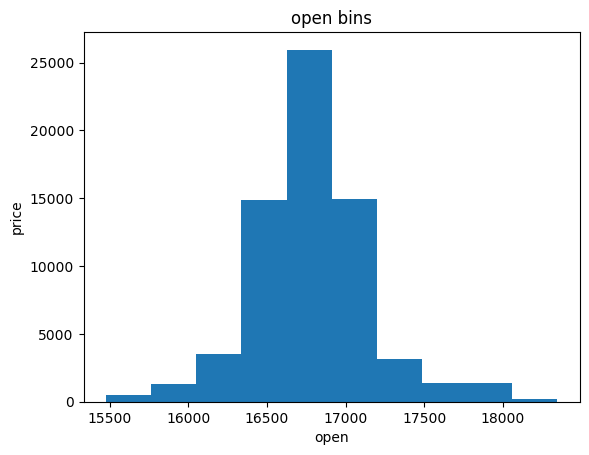

In [236]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["open"])

# set x/y labels and plot title
plt.pyplot.xlabel("open")
plt.pyplot.ylabel("price")
plt.pyplot.title("open bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of open, we want to set start_value = min(df["open"]).</p>
<p>Since we want to include the maximum value of open, we want to set end_value = max(df["open"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [237]:
bins = np.linspace(min(df["open"]), max(df["open"]), 4)
bins

array([15478.5       , 16433.86666667, 17389.23333333, 18344.6       ])

We set group  names:


In [238]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['open']` belongs to.


In [239]:
df['open-binned'] = pd.cut(df['open'], bins, labels=group_names, include_lowest=True )
df[['open','open-binned']].head(20)

,open,open-binned
0,16540.10,Medium
1,16489.30,Medium
2,16465.50,Medium
3,16492.90,Medium
4,16540.20,Medium
5,16498.30,Medium
6,16502.30,Medium
7,16540.70,Medium
8,16747.60,Medium
9,16829.80,Medium


Let's see the number of values in each bin:


In [240]:
df["open-binned"].value_counts()

Medium    56511
Low        6855
High       3925
Name: open-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'open bins')

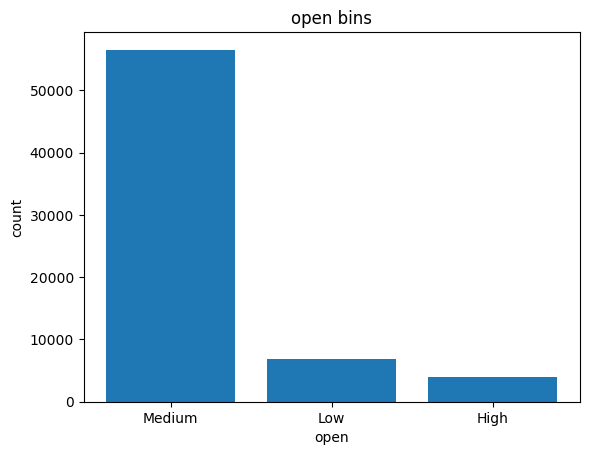

In [241]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# sort group names by number of values
group_names = ['Medium','Low', 'High']
pyplot.bar(group_names, df["open-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("open")
plt.pyplot.ylabel("count")
plt.pyplot.title("open bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "open" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 17113 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'open bins')

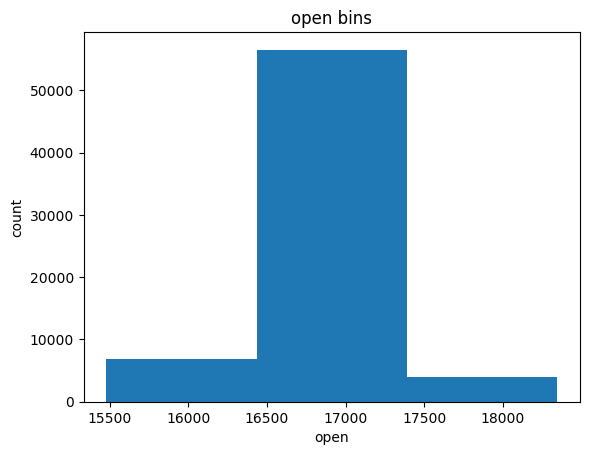

In [242]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "open" with bins = 3
plt.pyplot.hist(df["open"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("open")
plt.pyplot.ylabel("count")
plt.pyplot.title("open bins")

The plot above shows the binning result for the attribute "open".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "open-binned" has two unique values: "Low","Medium" and "High". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "open-binned" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of open binned. 
</p>


In [243]:
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'volume', 'rec_count',
       'avg_price', 'avg_price_eur', 'open_eur', 'high_eur', 'low_eur',
       'volume_norm', 'rec_counter_norm', 'open-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [244]:
dummy_variable_1 = pd.get_dummies(df["open-binned"])
dummy_variable_1.head()

,Low,Medium,High
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


Change the column names for clarity:


In [245]:
dummy_variable_1.rename(columns={'Low':'Low-open-price', 'Medium':'Medium-open-price','High':'High-open-price'}, inplace=True)
dummy_variable_1.head()

,Low-open-price,Medium-open-price,High-open-price
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In the dataframe, column 'open-binned' has values for 'Low','Medium and 'High' as 0s and 1s now.


In [246]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "open-binned" from "df"
df.drop("open-binned", axis = 1, inplace=True)

In [247]:
df.head()

,time,open,high,low,close,volume,rec_count,avg_price,avg_price_eur,open_eur,high_eur,low_eur,volume_norm,rec_counter_norm,Low-open-price,Medium-open-price,High-open-price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81,15195.46,15216.89,15216.89,15167.58,0.08,0.78,0,1,0
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84,15155.94,15170.16,15173.84,15139.70,0.08,0.83,0,1,0
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64,15160.35,15148.26,15176.32,15131.61,0.07,0.80,0,1,0
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50,15195.18,15173.47,15223.33,15154.70,0.08,0.80,0,1,0
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09,15204.93,15216.98,15223.33,15178.34,0.06,0.80,0,1,0


The last three columns are now the indicator variable representation of the open-binned variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "time" by days of week with func "day_name()"</b>

</div>


In [248]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
#get name of day 
s = df.time
#write in a new column 'day_name'
df['day_name'] = s.dt.day_name()

# get indicator variables of rec_count and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['day_name'])

# show first 5 instances of data frame "dummy_variable_2"
dummy_variable_2.head()

```

</details>


<h2 id="resample">Resample time-series data.</h2>

<b>What is a pandas.DataFrame.resample?</b>

<p>Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (<cite>DatetimeIndex</cite>, <cite>PeriodIndex</cite>,
or <cite>TimedeltaIndex</cite>), or the caller must pass the label of a datetime-like
series/index to the <code class="docutils literal notranslate"><span class="pre">on</span></code>/<code class="docutils literal notranslate"><span class="pre">level</span></code> keyword parameter.</p>

<b>Why we use a pandas.DataFrame.resample?</b>

<p>We use this function to get for some period summary data. </p>

Make new dataset:

In [283]:
series = pd.DataFrame()

Set column 'time' as index:

In [284]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

Find our dataframe per day:

In [287]:
series['open'] = df['open'].resample('D').first()
series['high'] = df['high'].resample('D').max()
series['low'] = df['low'].resample('D').min()
series['close'] = df['close'].resample('D').last()
series['volume'] = df['volume'].resample('D').sum()
series.head()

,open,high,low,close,volume
time,,,,,
2022-11-11,16540.10,17285.20,16447.40,17007.90,74739.17
2022-11-12,17015.90,17065.00,16584.30,16767.60,52341.30
2022-11-13,16777.00,16914.90,16204.20,16294.20,62939.03
2022-11-14,16294.20,17163.50,15780.00,16580.60,186617.98
2022-11-15,16580.60,17098.80,16493.60,16863.80,103571.06


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5: </h1>

<b>Make as in the example, but every 1 hour.</b>

</div>


In [290]:
# Write your code below and press Shift+Enter to execute


,open,high,low,close,volume
time,,,,,
2022-11-11 14:00:00,16540.10,17285.20,16447.40,16858.70,13618.72
2022-11-11 15:00:00,16941.65,17002.20,16616.10,16830.80,12821.83
2022-11-11 16:00:00,16831.00,16892.80,16510.50,16790.00,8928.02
2022-11-11 17:00:00,16789.90,16911.90,16706.10,16862.00,6667.88
2022-11-11 18:00:00,16862.00,16996.90,16753.60,16790.50,6885.34


<details><summary>Click here for the solution</summary>

```python

task = pd.DataFrame()
task['open'] = df['open'].resample('1H').first()
task['high'] = df['high'].resample('1H').max()
task['low'] = df['low'].resample('1H').min()
task['close'] = df['close'].resample('1H').last()
task['volume'] = df['volume'].resample('1H').sum()
task.head()

```

</details>


Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


In [203]:
df.to_csv('clean_df.csv')

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>

<a href="https://www.linkedin.com/in/bohdan-tsisinskyi-539913255/ " target="_blank" >Bohdan Tsisinskyi</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2023-01-23        | 3.0     | Bohdan     | Change dataset, rewrite file        |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
